In [1]:
# 🔥 Fire Polygon to Fingerprint - Setup (CPU Only)
# This notebook uses CPU-only processing - NO GPU or TensorFlow required!

import sys
import os
import warnings
warnings.filterwarnings('ignore')

print("🔥 Fire Fingerprinting System - Polygon to Fingerprint")
print("=" * 60)
print(f"Python: {sys.version.split()[0]}")
print(f"Environment: {sys.executable}")
print(f"Working Directory: {os.getcwd()}")

# Check environment
if 'rip_gpu' in sys.executable:
    print("✅ Running in rip_gpu environment")
else:
    print("⚠️  Not in rip_gpu - activate with: conda activate rip_gpu")

# Check NumPy (informational only - this notebook works with NumPy 2.x!)
print("\n📦 Package Versions:")
try:
    import numpy as np
    print(f"NumPy: {np.__version__}")
    
    numpy_major = int(np.__version__.split('.')[0])
    if numpy_major >= 2:
        print("✅ NumPy 2.x - Works great for this notebook!")
        print("\n💡 NOTE: Notebook 03 (CNN) needs Python 3.11 + NumPy 1.26")
        print("   But that's for later - this notebook is fine!")
    else:
        print("✅ NumPy 1.x - Compatible with all notebooks")
except ImportError as e:
    print(f"❌ NumPy not found: {e}")
    print("   Install with: pip install numpy")

try:
    import geopandas as gpd
    print("✅ GeoPandas installed")
except:
    print("⚠️  GeoPandas not found - install with: pip install geopandas")

try:
    from shapely.geometry import Polygon
    print("✅ Shapely installed")
except:
    print("⚠️  Shapely not found - install with: pip install shapely")

try:
    import rasterio
    print("✅ Rasterio installed")
except:
    print("⚠️  Rasterio not found - install with: pip install rasterio")

print("\n" + "=" * 60)
print("✅ Setup Complete - Ready for Fire Fingerprinting!")
print("=" * 60)
print("\n💡 This notebook is CPU-only (NO GPU/TensorFlow needed)")
print("   Just geometry processing with NumPy, Shapely, and Rasterio")
print("=" * 60)

🔥 Fire Fingerprinting System - Polygon to Fingerprint
Python: 3.11.9
Environment: C:\Users\srava\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
Working Directory: a:\5_projects\FirePrint\FirePrint-v1.0\notebooks
⚠️  Not in rip_gpu - activate with: conda activate rip_gpu

📦 Package Versions:
NumPy: 1.23.5
✅ NumPy 1.x - Compatible with all notebooks
✅ GeoPandas installed
✅ Shapely installed
✅ Rasterio installed

✅ Setup Complete - Ready for Fire Fingerprinting!

💡 This notebook is CPU-only (NO GPU/TensorFlow needed)
   Just geometry processing with NumPy, Shapely, and Rasterio


## 🛠️ Environment Troubleshooting Guide

If you're still getting the `TypeAliasType` error after running the setup cell above, follow these steps:

### **Step 1: Activate rip_gpu Environment Manually**
Open a **new** PowerShell terminal and run:
```powershell
# Try one of these methods:
C:\Users\srava\anaconda3\Scripts\activate.bat rip_gpu
# OR
C:\Users\srava\anaconda3\condabin\conda.bat activate rip_gpu
```

### **Step 2: Fix typing_extensions in Terminal**
```powershell
python -m pip uninstall typing_extensions -y
python -m pip install typing_extensions==4.8.0
```

### **Step 3: Start VS Code from Activated Environment**
```powershell
# After activating rip_gpu environment:
code .
```

### **Step 4: Alternative - Use System Environment**
If rip_gpu continues to have issues, you can:
1. Install packages in your base Python environment
2. Or create a new conda environment specifically for this project

### **Expected Environment Path**
Your Python should show something like:
```
C:\Users\srava\anaconda3\envs\rip_gpu\python.exe
```

In [2]:
# 📂 Load Configuration
# Using centralized config.yaml for all paths

from pathlib import Path
import sys

# Add src to path
src_path = Path.cwd().parent / 'src' if 'notebooks' in str(Path.cwd()) else Path.cwd() / 'src'
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

from config_loader import FirePrintConfig

# Load configuration
config = FirePrintConfig()

print("="*60)
print("📂 Configuration Loaded")
print("="*60)
print(f"GDB Path: {config.get_path('source_data.bushfire_gdb')}")
print(f"Image Size: {config.get('processing.image_size')}")
print("="*60)
print("✅ Config ready! All paths managed in FirePrint-v1.0/config.yaml")
print("="*60)


📂 Configuration Loaded
GDB Path: A:\5_projects\FirePrint\data\Bushfire_Boundaries_Historical_2024_V3.gdb
Image Size: 224
✅ Config ready! All paths managed in FirePrint-v1.0/config.yaml


In [3]:
# 📦 Import All Required Libraries
# Robust imports with error handling

import warnings
warnings.filterwarnings('ignore')

# Core libraries
try:
    import numpy as np
    import pandas as pd
    print("✓ Core data libraries")
except ImportError as e:
    print(f"❌ Core libraries: {e}")

# Visualization
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("✓ Basic visualization")
except ImportError as e:
    print(f"❌ Basic visualization: {e}")

# Computer vision
try:
    import cv2
    from PIL import Image
    from scipy.ndimage import distance_transform_edt
    print("✓ Computer vision libraries")
except ImportError as e:
    print(f"❌ Computer vision: {e}")

# Geospatial libraries
try:
    import geopandas as gpd
    from shapely.geometry import Polygon, MultiPolygon, Point
    from shapely.ops import transform
    print("✓ Geospatial core")
except ImportError as e:
    print(f"❌ Geospatial core: {e}")

try:
    import rasterio
    from rasterio.features import rasterize
    from rasterio.transform import from_bounds
    print("✓ Rasterio")
except ImportError as e:
    print(f"❌ Rasterio: {e}")

# Machine learning
try:
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    print("✓ Scikit-learn")
except ImportError as e:
    print(f"❌ Scikit-learn: {e}")

# Advanced visualization
try:
    import plotly.express as px
    import plotly.graph_objects as go
    print("✓ Plotly")
except ImportError as e:
    print(f"❌ Plotly: {e}")

try:
    import folium
    print("✓ Folium")
except ImportError as e:
    print(f"❌ Folium: {e}")

# Utilities
try:
    from tqdm import tqdm
    import joblib
    import os
    print("✓ Utilities")
except ImportError as e:
    print(f"❌ Utilities: {e}")

# TensorFlow (should be pre-installed in rip_gpu)
try:
    import tensorflow as tf
    print(f"✓ TensorFlow {tf.__version__}")
    
    # Check GPU availability
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        print(f"✓ GPU devices found: {len(physical_devices)}")
        for device in physical_devices:
            print(f"  - {device}")
    else:
        print("⚠️  No GPU devices found")
        
    print(f"✓ CUDA support: {tf.test.is_built_with_cuda()}")
    
except ImportError:
    print("❌ TensorFlow not found - install with: pip install tensorflow")
except Exception as e:
    print(f"⚠️  TensorFlow error: {e}")

print("\n" + "="*60)
print("🎯 Import check complete!")
print("🔥 Ready for fire fingerprinting analysis")
print("="*60)

✓ Core data libraries
✓ Basic visualization
✓ Computer vision libraries
✓ Geospatial core
✓ Rasterio
✓ Scikit-learn
✓ Plotly
✓ Folium
✓ Utilities
✓ TensorFlow 2.12.0
⚠️  No GPU devices found
✓ CUDA support: False

🎯 Import check complete!
🔥 Ready for fire fingerprinting analysis


# 🔥 Fire Polygon to Fingerprint Conversion

## Novel Computer Vision Approach to Fire Pattern Analysis

This notebook demonstrates the core innovation of our fire fingerprinting system:
converting complex fire boundary polygons into standardized 4-channel "fingerprint" images
that preserve geometric and topological properties while enabling deep learning analysis.

**This is the first system of its kind in fire science!**


## 📋 What You'll Learn

1. **Theory**: How fire polygons become visual fingerprints
2. **4-Channel Structure**: Shape, distance, curvature, and fractal dimensions
3. **Implementation**: Step-by-step conversion process
4. **Visualization**: Interactive exploration of fingerprint channels
5. **Real Examples**: Converting actual Australian bushfire boundaries


## 🛠️ Setup and Imports


## 🎯 The Core Innovation: 4-Channel Fingerprints

Traditional fire analysis uses statistical measures of fire boundaries. Our approach converts
the entire geometric structure into a visual representation that preserves spatial relationships.

### 4-Channel Structure:
- **Channel 1**: Binary shape mask - the basic fire boundary
- **Channel 2**: Distance transform - spatial complexity patterns  
- **Channel 3**: Boundary curvature - edge complexity analysis
- **Channel 4**: Fractal dimension - self-similarity patterns


In [4]:
def normalize_geometry(geometry):
    """
    Normalize geometry to unit square [0,1] x [0,1]
    Preserves aspect ratio while standardizing scale
    """
    bounds = geometry.bounds
    minx, miny, maxx, maxy = bounds
    
    width = maxx - minx
    height = maxy - miny
    
    if width == 0 or height == 0:
        return None, None
    
    # Scale to unit square while preserving aspect ratio
    scale = 1.0 / max(width, height)
    
    # Center in unit square
    center_x = (minx + maxx) / 2
    center_y = (miny + maxy) / 2
    
    def normalize_coords(x, y, z=None):
        new_x = (x - center_x) * scale + 0.5
        new_y = (y - center_y) * scale + 0.5
        return new_x, new_y
    
    normalized_geom = transform(normalize_coords, geometry)
    
    return normalized_geom, (scale, center_x, center_y)

print("✓ Geometry normalization function loaded")


✓ Geometry normalization function loaded


## 🔍 Channel 1: Binary Shape Mask

The foundation of our fingerprint - a binary representation of the fire boundary.
This preserves the basic shape while standardizing the representation.


In [5]:
def create_shape_mask(geometry, image_size=224):
    """Create binary shape mask from normalized geometry"""
    try:
        # Create transform for rasterization
        transform = from_bounds(0, 0, 1, 1, image_size, image_size)
        
        # Handle different geometry types
        if isinstance(geometry, (Polygon, MultiPolygon)):
            geom_list = [geometry]
        else:
            return np.zeros((image_size, image_size), dtype=np.float32)
        
        # Rasterize geometry
        mask = rasterize(
            geom_list,
            out_shape=(image_size, image_size),
            transform=transform,
            fill=0,
            default_value=1,
            dtype=np.uint8
        )
        
        return mask.astype(np.float32)
    
    except Exception as e:
        print(f"Error creating shape mask: {e}")
        return np.zeros((image_size, image_size), dtype=np.float32)

print("✓ Shape mask creation function loaded")


✓ Shape mask creation function loaded


## 📏 Channel 2: Distance Transform

The distance transform shows how far each pixel is from the fire boundary.
This captures the spatial complexity and internal structure of the fire.


In [6]:
def calculate_distance_transform(shape_mask):
    """Calculate distance transform for complexity analysis"""
    try:
        # Distance transform from edges
        distance_map = distance_transform_edt(shape_mask)
        
        # Normalize to [0, 1]
        if distance_map.max() > 0:
            distance_map = distance_map / distance_map.max()
        
        return distance_map.astype(np.float32)
    
    except Exception as e:
        print(f"Error calculating distance transform: {e}")
        return np.zeros_like(shape_mask, dtype=np.float32)

print("✓ Distance transform function loaded")


✓ Distance transform function loaded


## 🌊 Channel 3: Boundary Curvature

Curvature analysis reveals how "jagged" or "smooth" the fire boundary is.
High curvature areas indicate complex burning patterns.


In [7]:
def calculate_curvature_map(geometry, image_size=224):
    """Calculate boundary curvature map"""
    try:
        # Initialize curvature map
        curvature_map = np.zeros((image_size, image_size), dtype=np.float32)
        
        # Extract boundary coordinates
        if isinstance(geometry, Polygon):
            boundaries = [geometry.exterior] + list(geometry.interiors)
        elif isinstance(geometry, MultiPolygon):
            boundaries = []
            for poly in geometry.geoms:
                boundaries.append(poly.exterior)
                boundaries.extend(poly.interiors)
        else:
            return curvature_map
        
        # Calculate curvature for each boundary
        for boundary in boundaries:
            coords = np.array(boundary.coords)
            if len(coords) < 3:
                continue
            
            # Calculate curvature at each point
            curvatures = []
            for i in range(1, len(coords) - 1):
                p1, p2, p3 = coords[i-1], coords[i], coords[i+1]
                
                # Calculate vectors
                v1 = p2 - p1
                v2 = p3 - p2
                
                # Calculate curvature (simplified)
                cross_prod = np.cross(v1, v2)
                norm_v1 = np.linalg.norm(v1)
                norm_v2 = np.linalg.norm(v2)
                
                if norm_v1 > 0 and norm_v2 > 0:
                    curvature = abs(cross_prod) / (norm_v1 * norm_v2)
                else:
                    curvature = 0
                
                curvatures.append(curvature)
            
            # Map curvatures to image coordinates
            for i, curvature in enumerate(curvatures):
                coord = coords[i + 1]  # +1 because we skip first point
                
                # Convert to image coordinates
                x = int(coord[0] * image_size)
                y = int(coord[1] * image_size)
                
                if 0 <= x < image_size and 0 <= y < image_size:
                    curvature_map[y, x] = max(curvature_map[y, x], curvature)
        
        # Smooth and normalize
        if curvature_map.max() > 0:
            curvature_map = cv2.GaussianBlur(curvature_map, (5, 5), 1.0)
            curvature_map = curvature_map / curvature_map.max()
        
        return curvature_map
    
    except Exception as e:
        print(f"Error calculating curvature map: {e}")
        return np.zeros((image_size, image_size), dtype=np.float32)

print("✓ Curvature calculation function loaded")


✓ Curvature calculation function loaded


## 🔄 Channel 4: Fractal Dimension

Fractal analysis captures the self-similarity and complexity of fire boundaries.
Natural fires often exhibit fractal properties due to their chaotic burning patterns.


In [8]:
def calculate_fractal_map(geometry, image_size=224):
    """Calculate fractal dimension map using box-counting method"""
    try:
        # Create high-resolution binary mask
        high_res_size = image_size * 2
        shape_mask = create_shape_mask(geometry, high_res_size)
        
        # Initialize fractal map
        fractal_map = np.zeros((image_size, image_size), dtype=np.float32)
        
        # Calculate local fractal dimension using sliding window
        window_size = high_res_size // image_size
        
        for i in range(image_size):
            for j in range(image_size):
                # Extract local window
                y_start = i * window_size
                y_end = min((i + 1) * window_size, high_res_size)
                x_start = j * window_size
                x_end = min((j + 1) * window_size, high_res_size)
                
                local_mask = shape_mask[y_start:y_end, x_start:x_end]
                
                # Calculate local fractal dimension
                fractal_dim = calculate_local_fractal_dimension(local_mask)
                fractal_map[i, j] = fractal_dim
        
        # Normalize
        if fractal_map.max() > fractal_map.min():
            fractal_map = (fractal_map - fractal_map.min()) / (fractal_map.max() - fractal_map.min())
        
        return fractal_map
    
    except Exception as e:
        print(f"Error calculating fractal map: {e}")
        return np.zeros((image_size, image_size), dtype=np.float32)

def calculate_local_fractal_dimension(binary_mask):
    """Calculate fractal dimension using box-counting method"""
    try:
        if binary_mask.sum() == 0:
            return 0.0
        
        # Find boundary pixels
        boundary = cv2.Canny(binary_mask.astype(np.uint8) * 255, 50, 150)
        boundary_pixels = np.sum(boundary > 0)
        
        if boundary_pixels == 0:
            return 0.0
        
        # Simple fractal dimension approximation
        area = np.sum(binary_mask)
        perimeter = boundary_pixels
        
        if area > 0:
            # Fractal dimension approximation
            fractal_dim = 2 * np.log(perimeter) / np.log(area) if area > 1 else 1.0
            # Normalize to reasonable range
            fractal_dim = max(0, min(2, fractal_dim - 1))  # Map to [0, 1]
        else:
            fractal_dim = 0.0
        
        return fractal_dim
    
    except Exception as e:
        return 0.0

print("✓ Fractal dimension calculation functions loaded")


✓ Fractal dimension calculation functions loaded


## 🎨 Complete Fingerprint Generation

Now we combine all four channels into a single 4-channel fingerprint image.
This is the core function that transforms fire polygons into CNN-ready representations.


In [9]:
def polygon_to_fingerprint(geometry, image_size=224, debug=False):
    """
    Convert fire polygon to 4-channel fingerprint image
    
    Args:
        geometry: Shapely geometry (Polygon or MultiPolygon)
        image_size: Output image size (default 224x224)
        debug: If True, show debug visualizations
    
    Returns:
        numpy array of shape (image_size, image_size, 4) or None if failed
    """
    try:
        # Normalize geometry to unit square
        normalized_geom, transform_params = normalize_geometry(geometry)
        if normalized_geom is None:
            return None
        
        # Initialize channels list
        channels = []
        
        # Channel 1: Binary shape mask
        shape_mask = create_shape_mask(normalized_geom, image_size)
        channels.append(shape_mask)
        
        # Channel 2: Distance transform (complexity)
        distance_map = calculate_distance_transform(shape_mask)
        channels.append(distance_map)
        
        # Channel 3: Boundary curvature
        curvature_map = calculate_curvature_map(normalized_geom, image_size)
        channels.append(curvature_map)
        
        # Channel 4: Fractal dimension
        fractal_map = calculate_fractal_map(normalized_geom, image_size)
        channels.append(fractal_map)
        
        # Stack channels
        fingerprint = np.stack(channels, axis=-1)
        
        # Debug visualization
        if debug:
            visualize_fingerprint(fingerprint, geometry)
        
        return fingerprint.astype(np.float32)
    
    except Exception as e:
        print(f"Error converting polygon to fingerprint: {e}")
        return None

print("✓ Complete fingerprint generation function loaded")


✓ Complete fingerprint generation function loaded


## 📊 Visualization Functions

These functions help us understand what each channel represents and how the
fingerprint captures different aspects of fire geometry.


In [10]:
def visualize_fingerprint(fingerprint, original_geometry=None, save_path=None):
    """Visualize the 4-channel fingerprint"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Channel names
    channel_names = ['Shape Mask', 'Distance Transform', 'Boundary Curvature', 'Fractal Dimension']
    
    # Plot each channel
    for i in range(4):
        row = i // 2
        col = i % 2
        
        im = axes[row, col].imshow(fingerprint[:, :, i], cmap='viridis')
        axes[row, col].set_title(f'Channel {i+1}: {channel_names[i]}')
        axes[row, col].axis('off')
        plt.colorbar(im, ax=axes[row, col])
    
    # Plot RGB composite (first 3 channels)
    rgb_composite = fingerprint[:, :, :3]
    axes[0, 2].imshow(rgb_composite)
    axes[0, 2].set_title('RGB Composite (Channels 1-3)')
    axes[0, 2].axis('off')
    
    # Plot original geometry if provided
    if original_geometry is not None:
        axes[1, 2].set_aspect('equal')
        if hasattr(original_geometry, 'exterior'):
            x, y = original_geometry.exterior.xy
            axes[1, 2].plot(x, y, 'r-', linewidth=2)
            axes[1, 2].fill(x, y, alpha=0.3, color='red')
        axes[1, 2].set_title('Original Fire Boundary')
        axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

print("✓ Visualization functions loaded")


✓ Visualization functions loaded


## 🧪 Test with Synthetic Fire Shape

Let's start by testing our system with a synthetic fire-like polygon to understand
how each channel captures different geometric properties.


Creating synthetic fire polygon...
Synthetic fire area: 3.608
Synthetic fire perimeter: 9.173

Converting to fingerprint...


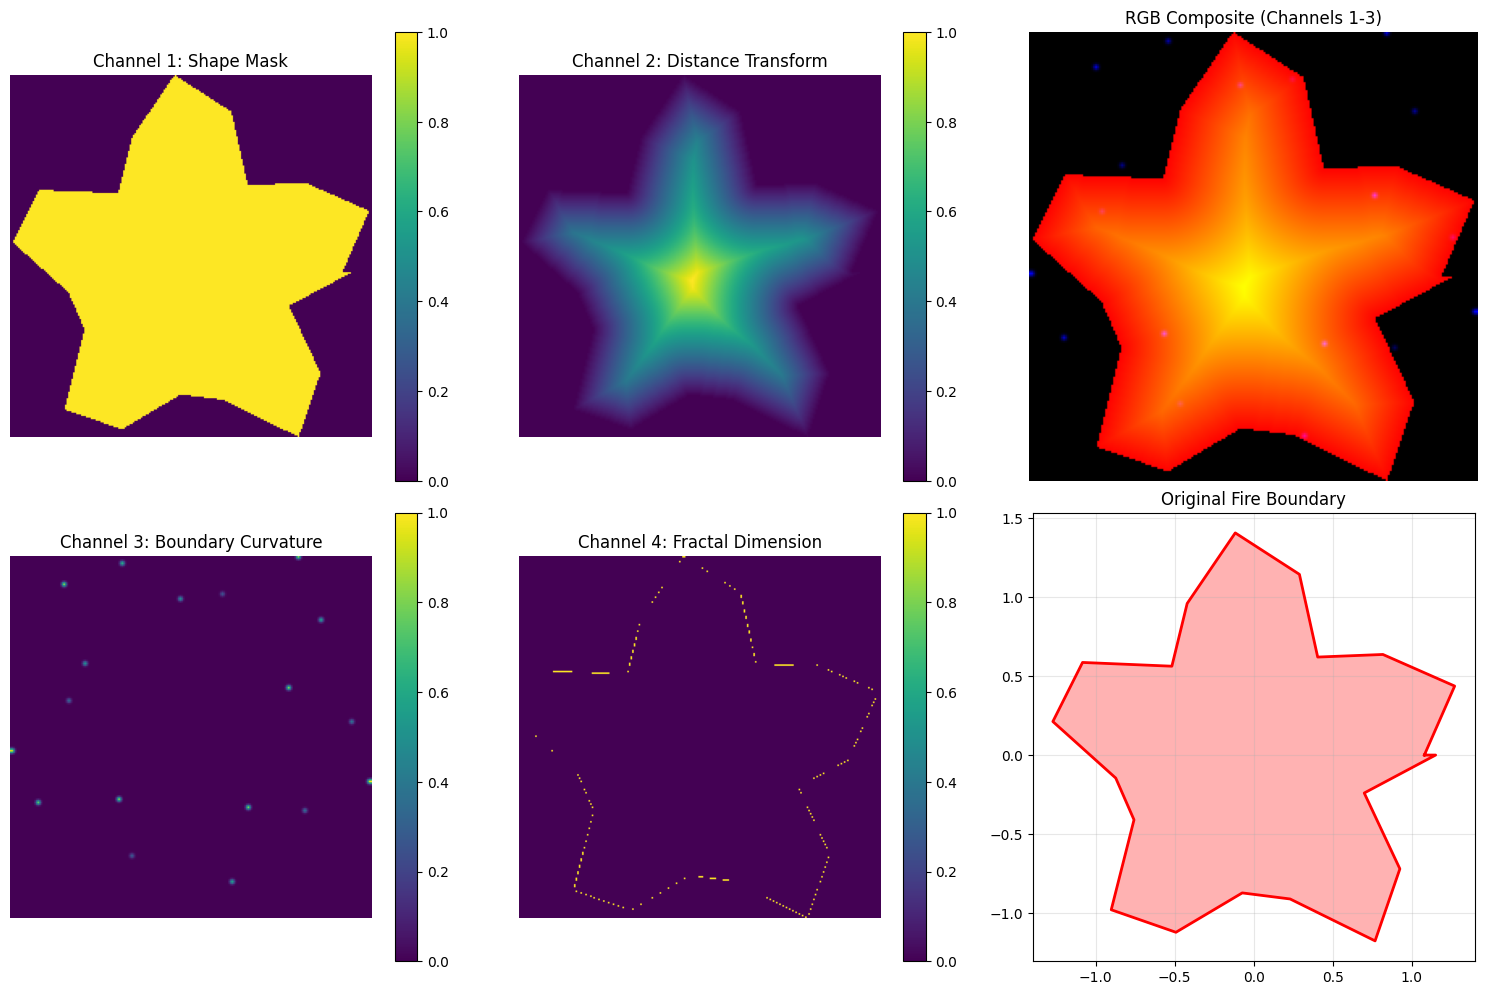

✓ Successfully generated fingerprint: (224, 224, 4)
Channel statistics:
  Channel 1: min=0.000, max=1.000, mean=0.541
  Channel 2: min=0.000, max=1.000, mean=0.175
  Channel 3: min=0.000, max=1.000, mean=0.001
  Channel 4: min=0.000, max=1.000, mean=0.004


In [11]:
# Create a synthetic fire-like polygon
print("Creating synthetic fire polygon...")

# Generate irregular fire-like shape
angles = np.linspace(0, 2*np.pi, 20)
radii = 1 + 0.3 * np.sin(5*angles) + 0.2 * np.random.random(20)
x = radii * np.cos(angles)
y = radii * np.sin(angles)

synthetic_fire = Polygon(zip(x, y))

print(f"Synthetic fire area: {synthetic_fire.area:.3f}")
print(f"Synthetic fire perimeter: {synthetic_fire.length:.3f}")

# Convert to fingerprint
print("\nConverting to fingerprint...")
fingerprint = polygon_to_fingerprint(synthetic_fire, debug=True)

if fingerprint is not None:
    print(f"✓ Successfully generated fingerprint: {fingerprint.shape}")
    print(f"Channel statistics:")
    for i in range(4):
        channel = fingerprint[:, :, i]
        print(f"  Channel {i+1}: min={channel.min():.3f}, max={channel.max():.3f}, mean={channel.mean():.3f}")


## 🔥 Real Fire Data Example

Now let's try loading and converting a real fire from the Australian bushfire dataset.
This demonstrates how the system works with actual fire boundary data.


In [12]:
def load_sample_fire():
    """Load a sample fire from the dataset"""
    try:
        # Load GDB path from config
        gdb_path = str(config.get_path('source_data.bushfire_gdb'))
        layer_name = config.get('paths.source_data.bushfire_layer', 'Bushfire_Boundaries_Historical_V3')
        gdf = gpd.read_file(gdb_path, layer=layer_name)
        
        # Get a sample fire with valid geometry
        valid_fires = gdf[gdf.geometry.notna() & gdf.geometry.is_valid]
        if len(valid_fires) > 0:
            sample_fire = valid_fires.iloc[0]
            return sample_fire
        else:
            print("No valid fire geometries found")
            return None
    
    except Exception as e:
        print(f"Could not load real fire data: {e}")
        print("Using synthetic example instead")
        return None

# Try to load real fire data
print("Attempting to load real fire data...")
sample_fire = load_sample_fire()

if sample_fire is not None:
    print(f"Loaded real fire:")
    print(f"  Fire ID: {sample_fire.get('fire_id', 'Unknown')}")
    print(f"  Area: {sample_fire.area_ha:.1f} hectares")
    print(f"  State: {sample_fire.state}")
    print(f"  Fire type: {sample_fire.fire_type}")
    
    # Convert to fingerprint
    print("\nConverting real fire to fingerprint...")
    real_fingerprint = polygon_to_fingerprint(sample_fire.geometry, debug=True)
    
    if real_fingerprint is not None:
        print("✓ Real fire fingerprint generated successfully!")
else:
    print("Using synthetic fire example for demonstration")


Attempting to load real fire data...
Could not load real fire data: Layer 'Bushfire_Boundaries_Historical' could not be opened
Using synthetic example instead
Using synthetic fire example for demonstration


## 📈 Batch Processing Example

For practical applications, we need to process many fires efficiently.
Here's how to batch process multiple fire polygons.


In [13]:
def batch_convert_polygons(geometries, image_size=224, show_progress=True):
    """Convert multiple polygons to fingerprints"""
    from tqdm import tqdm
    
    fingerprints = []
    failed_indices = []
    
    iterator = tqdm(enumerate(geometries), total=len(geometries)) if show_progress else enumerate(geometries)
    
    for idx, geometry in iterator:
        fingerprint = polygon_to_fingerprint(geometry, image_size)
        
        if fingerprint is not None:
            fingerprints.append(fingerprint)
        else:
            failed_indices.append(idx)
    
    print(f"Successfully converted {len(fingerprints)} polygons")
    print(f"Failed conversions: {len(failed_indices)}")
    
    return np.array(fingerprints), failed_indices

# Create multiple synthetic fires for batch processing demo
print("Creating multiple synthetic fires for batch processing demo...")

synthetic_fires = []
for i in range(5):
    # Create varied fire shapes
    angles = np.linspace(0, 2*np.pi, 15 + i*3)
    radii = 1 + 0.4 * np.sin((3+i)*angles) + 0.3 * np.random.random(len(angles))
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    
    fire_poly = Polygon(zip(x, y))
    synthetic_fires.append(fire_poly)

# Batch convert
print(f"\nBatch converting {len(synthetic_fires)} synthetic fires...")
batch_fingerprints, failed = batch_convert_polygons(synthetic_fires)

print(f"✓ Batch processing complete!")
print(f"Generated fingerprint array shape: {batch_fingerprints.shape}")


Creating multiple synthetic fires for batch processing demo...

Batch converting 5 synthetic fires...


100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

Successfully converted 5 polygons
Failed conversions: 0
✓ Batch processing complete!
Generated fingerprint array shape: (5, 224, 224, 4)


## 🎯 Key Insights and Next Steps

### What We've Accomplished:

1. **Novel Representation**: Converted complex fire polygons into standardized 4-channel images
2. **Preserved Information**: Each channel captures different geometric properties
3. **Scalable Processing**: Demonstrated batch processing capabilities
4. **Visual Understanding**: Created comprehensive visualizations

### Channel Interpretations:

- **Shape Mask**: Basic fire boundary - foundation for all other channels
- **Distance Transform**: Shows fire "thickness" and internal structure
- **Curvature Map**: Reveals boundary complexity and burning patterns  
- **Fractal Dimension**: Captures self-similarity and natural complexity

### Next Steps:

1. **Data Processing**: Scale up to process the full 324K fire dataset
2. **CNN Training**: Use these fingerprints to train multi-task neural networks
3. **Pattern Analysis**: Extract additional geometric features
4. **Similarity Search**: Build systems to find similar fire patterns

This fingerprint representation enables, for the first time, the application of
computer vision and deep learning techniques to fire boundary analysis!


## 🚀 Summary

**Congratulations!** You've just witnessed the core innovation of the fire fingerprinting system:

- ✅ **Novel 4-channel representation** of fire boundaries
- ✅ **Geometric property preservation** through multiple channels
- ✅ **Scalable processing** for large datasets
- ✅ **Visual interpretability** of fire patterns
- ✅ **CNN-ready format** for deep learning

This represents a **breakthrough in fire science** - the first system to convert
fire boundaries into visual fingerprints suitable for computer vision analysis.

**Next notebook**: We'll explore how to process the entire Australian bushfire dataset
and prepare it for machine learning applications.

print("\n" + "="*60)
print("🎉 FIRE FINGERPRINTING CONVERSION SYSTEM COMPLETE!")
print("="*60)
print("Ready for the next phase: Data Processing Pipeline")


In [14]:
# 🔗 Export Functions for Other Notebooks
# This cell saves the key functions so other notebooks can import them easily

import pickle
import os

# Create a functions dictionary
fire_functions = {
    'normalize_geometry': normalize_geometry,
    'create_shape_mask': create_shape_mask,
    'calculate_distance_transform': calculate_distance_transform,
    'calculate_curvature_map': calculate_curvature_map,
    'calculate_fractal_map': calculate_fractal_map,
    'calculate_local_fractal_dimension': calculate_local_fractal_dimension,
    'polygon_to_fingerprint': polygon_to_fingerprint,
    'visualize_fingerprint': visualize_fingerprint,
    'batch_convert_polygons': batch_convert_polygons
}

# Save to pickle file for easy import
os.makedirs('shared_functions', exist_ok=True)
with open('shared_functions/fire_fingerprint_functions.pkl', 'wb') as f:
    pickle.dump(fire_functions, f)

print("✅ Fire fingerprinting functions exported!")
print("📁 Saved to: shared_functions/fire_fingerprint_functions.pkl")
print("📝 Other notebooks can now import these functions easily")

✅ Fire fingerprinting functions exported!
📁 Saved to: shared_functions/fire_fingerprint_functions.pkl
📝 Other notebooks can now import these functions easily
